## User's manual for the BayesObjects.py classes

Most users will not need to access directly the classes defined in BayesObjects.py. 

Instead, a user interested in applying the bayesian analysis to a dataset will most likely use the wrapper functions that perform the analysis in a batch, and create diagnostic graphs. 
For this, see LINK TO NOTEBOOK

This notebook serves as a users manual for a more advanced user who wishes to analyze and access specific outputs from the wrapper codes and/or create custom graphs. 

## 0. Necessary packages

In [1]:
import pyRaven as rav

from pprint import pprint

loading specpolFlow package


## 1. Quick description of the object classes

BayesObjects.py defines X python objects as classes. Each object are initialized by passing the necessary data, and provide a write method to a h5 file. Function are also provided to read in the saved h5 files. 

All of the objects have a `Object.data`, which contains a multi-D matrix with the actual data (chi2, probability, etc). The object also has additional datasets that contains the grid values for each dimension of the data array (e.g. `Object.Bpole_arr`). The objects may also contain additional metadata, for example a string containing the name of the observation. 

* chi object: 
    - a 3D dataset, with dimensions (beta, Bpole, phi)
    - the grid definition (beta_arr, Bpole_arr, phi_arr)
    - the inclination used (float), the ObsID string

* lnP_odds object:
    - a 4D dataset, with dimensions (beta, Bpole, phi, incl)
    - the grid definition (beta_arr, Bpole_arr, phi_arr, incl_arr)
    - the ObsID string. 

* lnP_pars object:
    - a 5D dataset, with dimensions (beta, Bpole, phi, incl, noise)
    - the grid definition (beta_arr, Bpole_arr, phi_arr, incl_arr, noise_arr)
    - the ObsID string
    - Note: This class in fact is a child class of lnP_odds, with the addition of the scale parameter. 

* lnP_mar object:
    - a 3D dataset, with dimensions (beta, Bpole, incl)
    - the grid definition (beta_arr, Bpole_arr, incl_arr)
    - the ObsID string
    - The main use for this class is to store our probabilities that have been marginalized for the rotational phase (and the noise scale parameter for the parameter estimation -- because the latter is also marginalized, there was no need for two separate classes for the odds ratio calculations and the parameter estimation). 

## 2. The chi class

The usage of this class is mainly to serve as containers in the loop calculation (as can be gleaned from the class function that creates an empty object)

This said, the class can be used to examine individual chi2 files. As a reminder, to save on RAM usage, the loop code creates one datafile for each of the outer loop on the inclination grid. 

The cell below load in an example chi2 file, and display the content of the object. 

In [2]:
chi2 = rav.BayesObjects.read_chi('ExampleData/BayesObject_user/chiV_i5obs0.h5')

vars(chi2)

{'data': array([[[ 198.22318866,  198.22318866,  198.22318866, ...,
           198.22318866,  198.22318866,  198.22318866],
         [ 201.10054504,  201.1004485 ,  201.10051269, ...,
           201.10049601,  201.10043842,  201.10054504],
         [ 206.3923549 ,  206.39194372,  206.39215983, ...,
           206.39213313,  206.39196855,  206.3923549 ],
         ...,
         [ 819.26378252,  819.21127873,  819.23295433, ...,
           819.23412683,  819.22144904,  819.26378252],
         [ 875.25911543,  875.20171701,  875.22538664, ...,
           875.22668908,  875.21286695,  875.25911543],
         [ 933.6689018 ,  933.60639067,  933.63214205, ...,
           933.63358109,  933.61856524,  933.6689018 ]],
 
        [[ 198.22318866,  198.22318866,  198.22318866, ...,
           198.22318866,  198.22318866,  198.22318866],
         [ 202.08614529,  202.08681407,  202.05948559, ...,
           202.00162157,  202.05742032,  202.08614529],
         [ 209.57930159,  209.56584321,  209.46

In the cell below, we use a class method to make a Beta-Bpole chi2 (total, not reduced) map for the i-th phase in the file. 

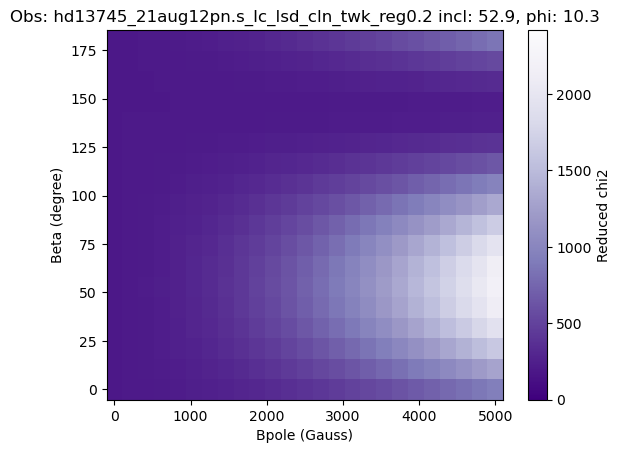

In [5]:
i_phase = 1
fig, ax = chi2.plot(i_phase)

The chi2 object did not save the number of data points in the observation (as the likelihood calculation requires the total chi2). But if one wishes to make a graph of the reduced chi2, the number of datapoint can be retrieved from the associated datapacket file/object and one can simply run:
``` 
chi2.data = chi2.data / npoints
i_phase = 1
chi2.plot(i_phase)


## The lnP_PARS class